<a href="https://colab.research.google.com/github/Vilokshana/Naan-Mudhalvan/blob/main/NM(UNIT_5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Real-Time Speech-to-Text System for Customer Support Automation**

In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
import soundfile as sf
from tqdm import tqdm

# Set root directory where the folders are
root_dir = r"C:\Users\Dell\Downloads\dev-clean\dev-clean"

# Supported extensions
AUDIO_EXTENSIONS = ('.wav', '.mp3', '.flac', '.ogg')

# List to hold data
data = []

# Walk through folders
for root, _, files in os.walk(root_dir):
    for file in files:
        if file.endswith(AUDIO_EXTENSIONS):
            full_path = os.path.join(root, file)
            try:
                y, sr = librosa.load(full_path, sr=16000)
                duration = librosa.get_duration(y=y, sr=sr)
                mfcc = librosa.feature.mfcc(y=y, sr=sr)
                pitch = librosa.yin(y, fmin=50, fmax=300)
                energy = np.sum(y**2)/len(y)

                snr_estimate = 10 * np.log10(np.mean(y**2) / (np.var(y - np.mean(y)) + 1e-8))

                data.append({
                    "file_path": full_path,
                    "duration_sec": duration,
                    "mfcc_mean": mfcc.mean(),
                    "pitch_mean": pitch.mean(),
                    "energy": energy,
                    "sentence": "unknown",
                    "snr_db": snr_estimate
                })
            except Exception as e:
                print(f"Error processing {full_path}: {e}")

# Convert to DataFrame
df = pd.DataFrame(data)

# Optional: classify audio as "clean" or "noisy" based on SNR threshold
df["label"] = df["snr_db"].apply(lambda x: "clean" if x > 10 else "noisy")

# Save for Power BI
df.to_csv("audio_features_metadata_5.csv", index=False)
print("Metadata and features saved.")

In [ ]:
df

,file_path,duration_sec,mfcc_mean,pitch_mean,energy,sentence,snr_db,label
0,C:\Users\Dell\Downloads\dev-clean\dev-clean\12...,4.256,-19.936130,170.309389,0.004718,unknown,-0.000009,noisy
1,C:\Users\Dell\Downloads\dev-clean\dev-clean\12...,3.072,-19.217770,183.000636,0.006521,unknown,-0.000006,noisy
2,C:\Users\Dell\Downloads\dev-clean\dev-clean\12...,7.936,-23.359741,181.629704,0.003518,unknown,-0.000013,noisy
3,C:\Users\Dell\Downloads\dev-clean\dev-clean\12...,4.192,-19.572718,183.289807,0.006072,unknown,-0.000008,noisy
4,C:\Users\Dell\Downloads\dev-clean\dev-clean\12...,11.968,-23.073483,183.592144,0.004004,unknown,-0.000012,noisy
...,...,...,...,...,...,...,...,...
2698,C:\Users\Dell\Downloads\dev-clean\dev-clean\88...,4.864,-28.188143,234.600554,0.001484,unknown,-0.000029,noisy
2699,C:\Users\Dell\Downloads\dev-clean\dev-clean\88...,6.400,-28.525460,238.159868,0.001766,unknown,-0.000025,noisy
2700,C:\Users\Dell\Downloads\dev-clean\dev-clean\88...,4.736,-25.079040,250.216901,0.002063,unknown,-0.000021,noisy
2701,C:\Users\Dell\Downloads\dev-clean\dev-clean\88...,3.072,-26.802496,238.706155,0.002826,unknown,-0.000015,noisy


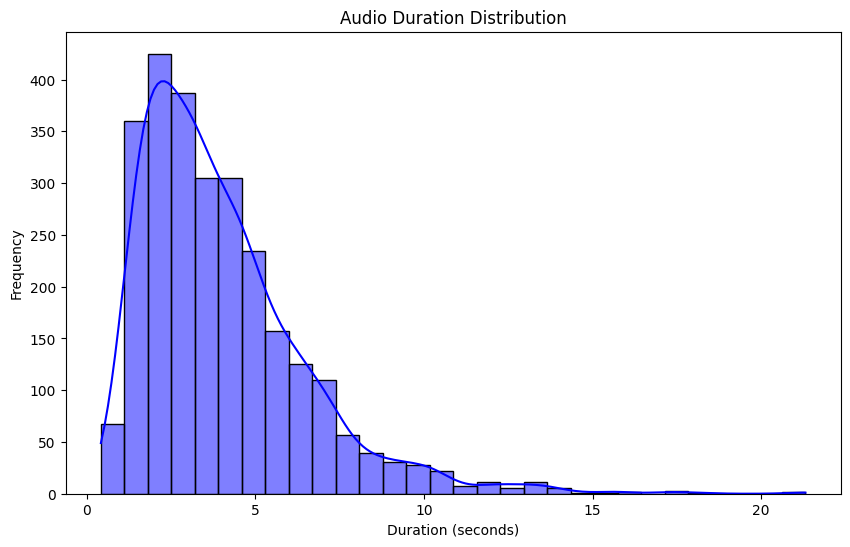

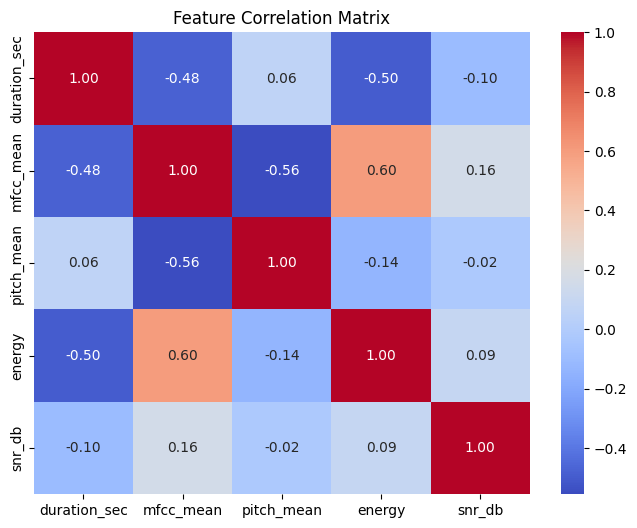

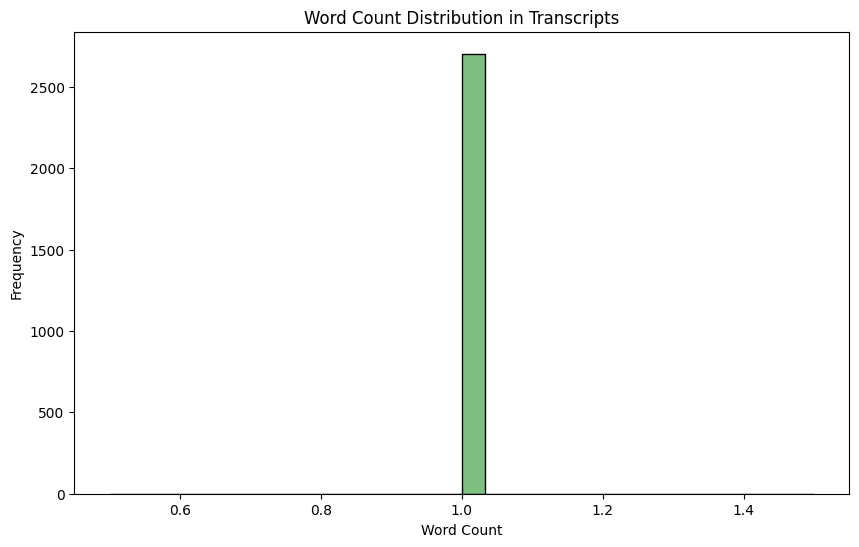

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Basic statistics of the audio features
audio_stats = df[['duration_sec', 'mfcc_mean', 'pitch_mean', 'energy', 'snr_db']].describe()

# Transcript analysis
df['word_count'] = df['sentence'].apply(lambda x: len(x.split()))
df['vocab_size'] = df['sentence'].apply(lambda x: len(set(x.split())))
df['avg_word_length'] = df['sentence'].apply(lambda x: np.mean([len(word) for word in x.split()]))

# Analyze the distribution of audio features
plt.figure(figsize=(10, 6))
sns.histplot(df['duration_sec'], kde=True, color='blue', bins=30)
plt.title('Audio Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# Feature Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df[['duration_sec', 'mfcc_mean', 'pitch_mean', 'energy', 'snr_db']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# Analyze transcript length and vocabulary size
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], kde=True, color='green', bins=30)
plt.title('Word Count Distribution in Transcripts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()



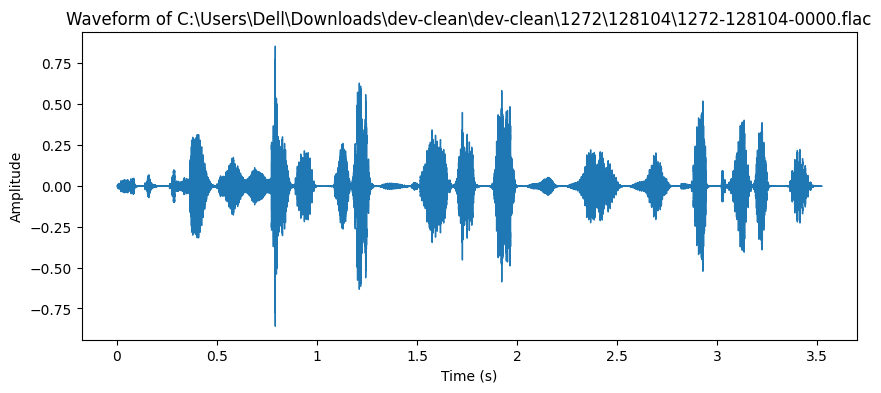

C:\Users\Dell\AppData\Local\Temp\ipykernel_5012\1574501177.py:15: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(audio), ref=np.max)


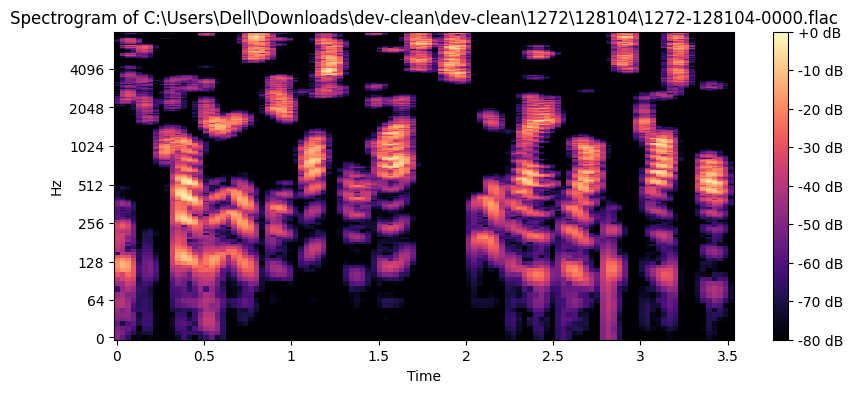

In [ ]:
import librosa
import librosa.display

def plot_waveform(file_path):
    audio, sr = librosa.load(file_path, sr=16000)
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio, sr=sr)
    plt.title(f"Waveform of {file_path}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

def plot_spectrogram(file_path):
    audio, sr = librosa.load(file_path, sr=16000)
    D = librosa.amplitude_to_db(librosa.stft(audio), ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(D, x_axis='time', y_axis='log', sr=sr)
    plt.title(f"Spectrogram of {file_path}")
    plt.colorbar(format="%+2.0f dB")
    plt.show()

# Example: Visualize for a specific file
file_path = df['file_path'].iloc[0]  # Use the first file in your dataset
plot_waveform(file_path)
plot_spectrogram(file_path)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset

# Preprocessing
X = df['sentence']
y = df['label']

# Encode labels (assuming `label` is categorical)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert sentences to TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_val_tfidf = vectorizer.transform(X_val).toarray()

# Create a custom Dataset class for PyTorch
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = torch.tensor(texts, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]

# Create DataLoader
train_data = TextDataset(X_train_tfidf, y_train)
val_data = TextDataset(X_val_tfidf, y_val)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)


In [ ]:
class SentimentModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SentimentModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return self.softmax(x)

# Initialize model, loss function, and optimizer
input_size = X_train_tfidf.shape[1]
hidden_size = 128
output_size = len(np.unique(y))  # Number of unique labels

model = SentimentModel(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    avg_loss = running_loss / len(train_loader)
    accuracy = correct_predictions / total_samples * 100
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")


Epoch [1/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [2/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [3/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [4/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [5/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [6/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [7/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [8/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [9/10], Loss: 0.0000, Accuracy: 100.00%
Epoch [10/10], Loss: 0.0000, Accuracy: 100.00%


In [ ]:
import torch

# Convert X_val_tfidf to a PyTorch tensor
X_val_tensor = torch.tensor(X_val_tfidf, dtype=torch.float32)

# Make sure that the model is in evaluation mode
model.eval()

# Get predictions from the model
with torch.no_grad():
    predictions = model(X_val_tensor)  # Forward pass with tensor input
    predicted_labels = torch.argmax(predictions, dim=1).numpy()  # Get predicted class labels

# Save results to a DataFrame
output_df = pd.DataFrame({
    "file_path": df['file_path'].iloc[X_val.index],  # Use X_val.index if necessary
    "predicted_label": predicted_labels,
    "true_label": y_val
})

# Save to CSV
output_df.to_csv('model_predictions.csv', index=False)



In [ ]:
!pip install librosa pandas numpy matplotlib seaborn scikit-learn torch torchaudio transformers soundfile
!pip install speechrecognition pyaudio powerbiclient



   ---------------------------------------- 0.0/212.5 MB ? eta -:--:--
    --------------------------------------- 3.1/212.5 MB 15.3 MB/s eta 0:00:14
   - -------------------------------------- 10.5/212.5 MB 29.7 MB/s eta 0:00:07
   ----- ---------------------------------- 29.9/212.5 MB 48.6 MB/s eta 0:00:04
   -------- ------------------------------- 45.6/212.5 MB 55.8 MB/s eta 0:00:03
   ------------ --------------------------- 65.3/212.5 MB 63.0 MB/s eta 0:00:03
   --------------- ------------------------ 84.7/212.5 MB 68.3 MB/s eta 0:00:02
   ------------------- ------------------- 104.9/212.5 MB 72.7 MB/s eta 0:00:02
   ---------------------- ---------------- 124.8/212.5 MB 75.1 MB/s eta 0:00:02
   ------------------------- ------------- 136.3/212.5 MB 73.8 MB/s eta 0:00:02
   -------------------------- ------------ 145.8/212.5 MB 70.5 MB/s eta 0:00:01
   ---------------------------- ---------- 156.8/212.5 MB 68.1 MB/s eta 0:00:01
   ------------------------------ -------- 167.2/2

In [ ]:
!pip install librosa pandas

In [ ]:
# Step 1: Import Required Libraries
import os
import tarfile
import librosa
import numpy as np
import matplotlib.pyplot as plt
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import torch
from IPython.display import Audio

# Step 2: Extract TAR.GZ File
def extract_tar_gz(file_path, extract_path='librispeech_data'):
    if not os.path.exists(extract_path):
        os.makedirs(extract_path)
    with tarfile.open(file_path, 'r:gz') as tar:
        tar.extractall(path=extract_path)
    print(f"Extracted to: {extract_path}")
    return extract_path

# Step 3: Load and Preprocess Audio
def load_audio(file_path, target_sr=16000):
    audio, sr = librosa.load(file_path, sr=target_sr)
    audio = audio / np.max(np.abs(audio))  # Normalize
    return audio, sr

# Step 4: Visualize Audio
def plot_waveform(audio, sr):
    plt.figure(figsize=(10, 4))
    plt.plot(np.linspace(0, len(audio)/sr, len(audio)), audio)
    plt.title("Waveform")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

# Step 5: ASR Model Class
class ASRModel:
    def __init__(self):
        self.processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
        self.model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")
        self.model.eval()

    def transcribe(self, audio):
        inputs = self.processor(audio, return_tensors="pt", sampling_rate=16000)
        with torch.no_grad():
            logits = self.model(inputs.input_values).logits
        predicted_ids = torch.argmax(logits, dim=-1)
        return self.processor.batch_decode(predicted_ids)[0]

# Step 6: Main Execution
def run_asr_pipeline(tar_gz_path):
    extracted_path = extract_tar_gz(tar_gz_path)

    # Search for .flac files (LibriSpeech format)
    flac_files = []
    for root, _, files in os.walk(extracted_path):
        for file in files:
            if file.endswith(".flac") or file.endswith(".wav"):
                flac_files.append(os.path.join(root, file))

    if not flac_files:
        print("No audio files found.")
        return

    model = ASRModel()

    for file_path in flac_files[:5]:  # Limit to 5 samples for demo
        print(f"\n🔹 Processing File: {os.path.basename(file_path)}")
        audio, sr = load_audio(file_path)
        plot_waveform(audio, sr)
        display(Audio(audio, rate=sr))  # Playback
        transcription = model.transcribe(audio)
        print(f"📝 Transcription: {transcription}")

# Example usage:
# run_asr_pipeline("dev-clean.tar.gz")  # <-- Replace with actual uploaded filename

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1748\3220317901.py:16: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=extract_path)


Extracted to: librispeech_data

🔹 Processing File: 1272-128104-0000.flac


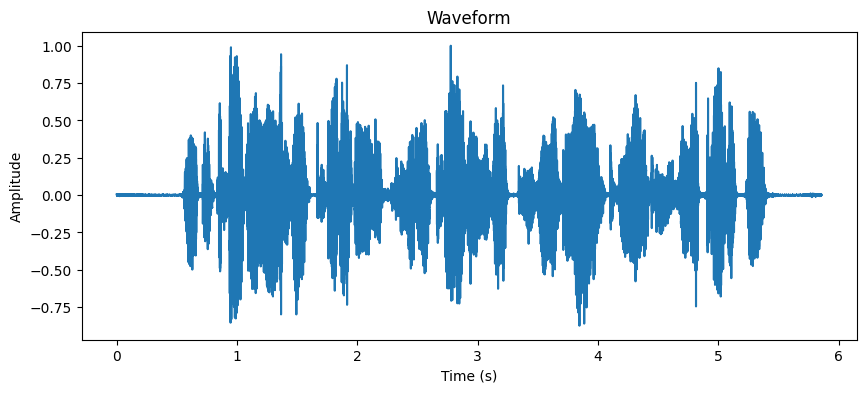

📝 Transcription: MISTER QUILTER IS THE APOSTLE OF THE MIDDLE CLASSES AND WE ARE GLAD TO WELCOME HIS GOSPEL

🔹 Processing File: 1272-128104-0001.flac


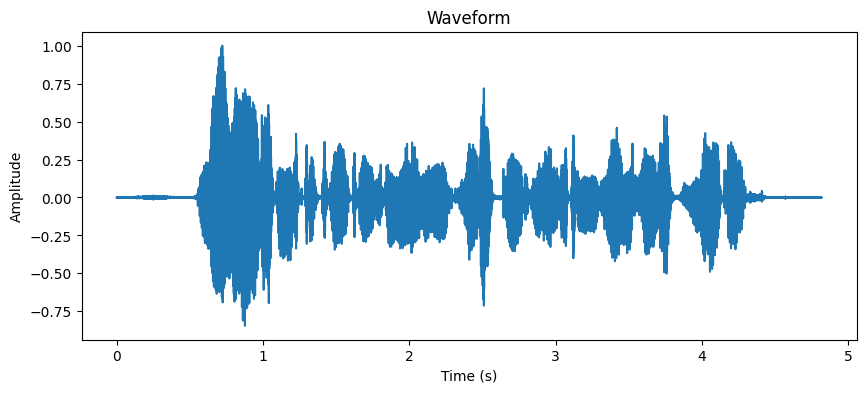

📝 Transcription: NOR IS MISTER QUILTER'S MANNER LESS INTERESTING THAN HIS MATTER

🔹 Processing File: 1272-128104-0002.flac


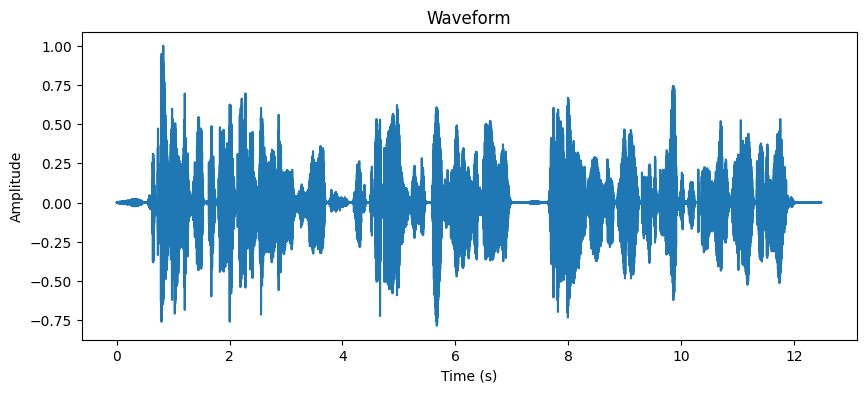

📝 Transcription: HE TELLS US THAT AT THIS FESTIVE SEASON OF THE YEAR WITH CHRISTMANUS AND ROAST BEEF LOOMING BEFORE US SIMILES DRAWN FROM EATING AND ITS RESULTS OCCUR MOST READILY TO THE MIND

🔹 Processing File: 1272-128104-0003.flac


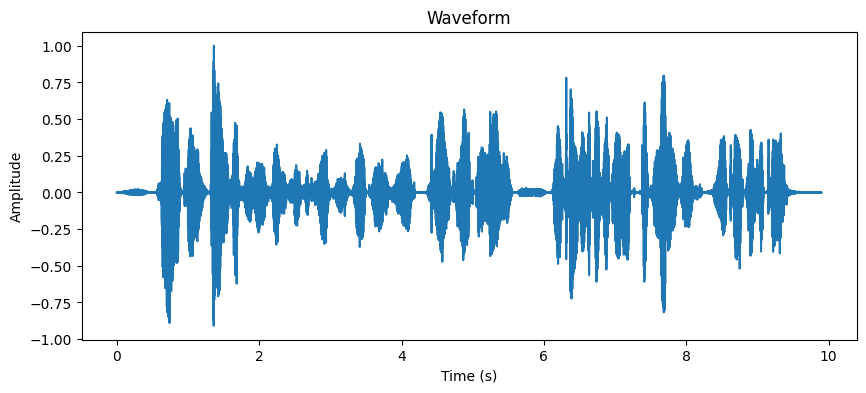

📝 Transcription: HE HAS GRAVED DOUBTS WHETHER SIR FREDERICK LAYTON'S WORK IS READY GREEK AFTER ALL AND CAN DISCOVER IN IT BUT LITTLE OF ROCKY ITHACA

🔹 Processing File: 1272-128104-0004.flac


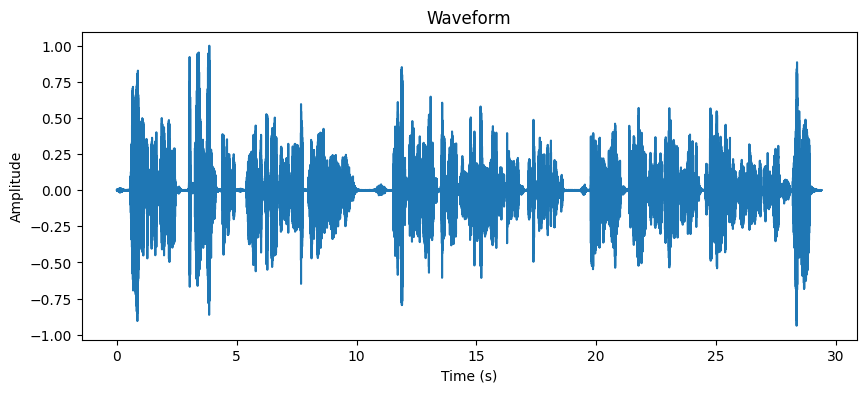

📝 Transcription: LINILL'S PICTURES ARE A SORT OF UP GUARDS AND ADAM PAINTINGS AND MASON'S EXQUISITE ITLS ARE AS NATIONAL AS A JINGO POEM MISTER BIRKATT FOSTERS LANDSCAPES SMILE AT ONE MUCH IN THE SAME WAY THAT MISTER CARKER USED TO FLASH HIS TEETH AND MISTER JOHN CAWLEYER GIVES HIS SITTER A CHEERFUL SLAP ON THE BACK BEFORE HE SAYS LIKE A CHAMPOOLER IN A TURKISH BATH NEXT MAN


In [ ]:
run_asr_pipeline("dev-clean.tar.gz")
